### Задача - на основании имеющихся данных о физических параметрах грибов, построить модель классификации о том, можно или нельзя есть данный гриб.

Target - колонка class

Все остальные - признаки

Постараться использовать все изученные техники:

- если есть, заполнить  пропуски
- посмотреть корреляции и выбрать только нужные признаки
- удалить выбросы (значения выпадающие за 90% квантиль)
- закодировать категориальные признаки
- оценить баланс классов

Построить модель и оценить результат

Оформить результат в виде блокнота, следующего наименования **ДЗ_Фамилия_Имя.ipynb** и положить в исходную папку

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
df = pd.read_csv('mushroom_cleaned.csv.zip')

In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [ ]:
df.shape

(54035, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


<Axes: ylabel='stem-height'>

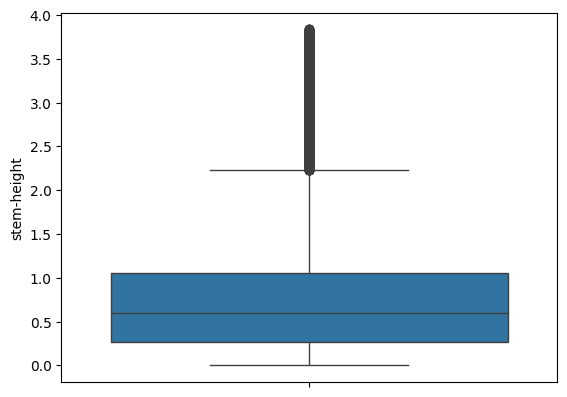

In [ ]:
import seaborn as sns
sns.boxplot(df['stem-height'])

### Проверка пропусков

In [ ]:
df.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


### Проверка корреляций

<Axes: >

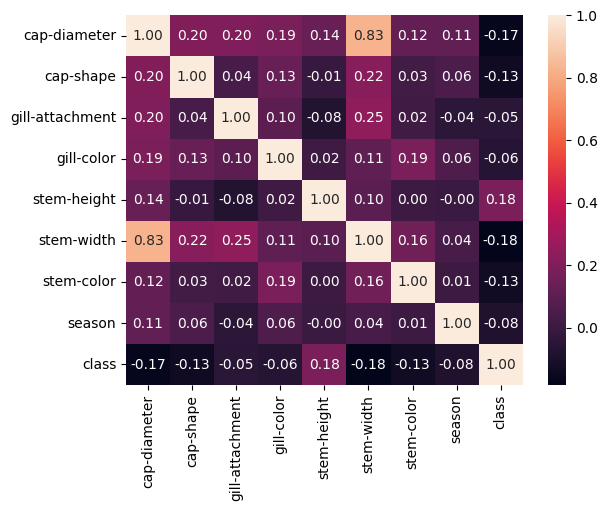

In [ ]:
numerical = df.describe().columns
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f')

In [ ]:
df = df.drop(['cap-diameter'], axis=1)
numerical = df.describe().columns

<Axes: >

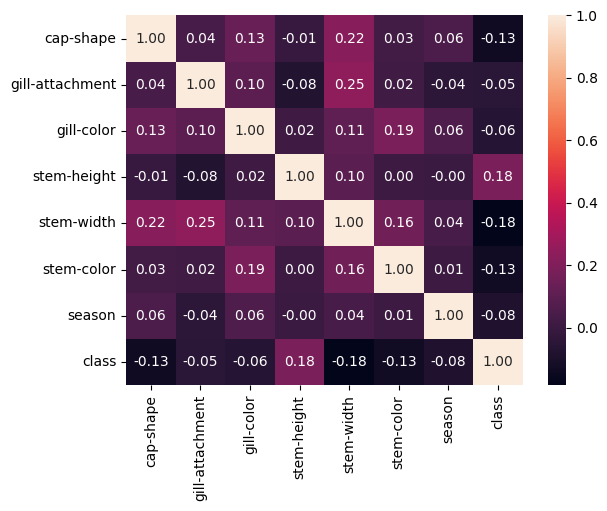

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f')

### Удаление выбросов (значения выше 90% квантиля)

In [ ]:
quantile_90 = df.quantile(0.90)
df_we = df[df <= quantile_90].dropna()
print(f"Размер данных с выбросами: {df.shape}, после удаления выбросов: {df_we.shape}")

Размер данных с выбросами: (54035, 8), после удаления выбросов: (40891, 8)


### Оценка баланса классов

In [ ]:
class_balance = df_we['class'].value_counts(normalize=True)
print("Баланс классов:\n", class_balance)

Баланс классов:
 class
1    0.548409
0    0.451591
Name: proportion, dtype: float64


In [ ]:
df.head()

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2,2,10,3.807467,1545,11,1.804273,1
1,2,2,10,3.807467,1557,11,1.804273,1
2,2,2,10,3.612496,1566,11,1.804273,1
3,6,2,10,3.787572,1566,11,1.804273,1
4,6,2,10,3.711971,1464,11,0.943195,1


### Подготовка данных

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
print(df_we['class'].value_counts())

class
1    22425
0    18466
Name: count, dtype: int64


In [ ]:
X = df_we.drop('class', axis=1)
Y = df_we['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### LogisticRegression

In [ ]:
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('Log',LogisticRegression(random_state=42))
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Log', LogisticRegression(random_state=42))])

In [ ]:
predict = pipe.predict(X_test)

In [ ]:
pipe.score(X_test, Y_test)

0.6453095960089993

In [ ]:
pipe.classes_

array([0, 1])

In [ ]:
predict[0:5]

array([0, 0, 0, 1, 1])

In [ ]:
pipe.predict_proba(X_test[0:5])

array([[0.64449907, 0.35550093],
       [0.54639767, 0.45360233],
       [0.56947469, 0.43052531],
       [0.30209782, 0.69790218],
       [0.34132838, 0.65867162]])

In [ ]:
pipe.decision_function(X_test[0:5])

array([-0.59494553, -0.18612616, -0.27970821,  0.83732807,  0.65738009])

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, pipe.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 2540
False Positive: 2112
False Negative: 1514
True Positive: 4057


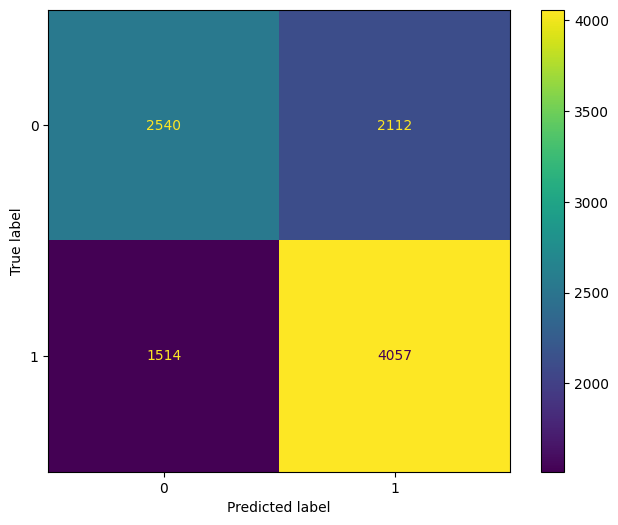

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.645
Precision равно: 0.658
Recall равно: 0.728
F-мера равно: 0.691


### ROC/PR и AUC кривые

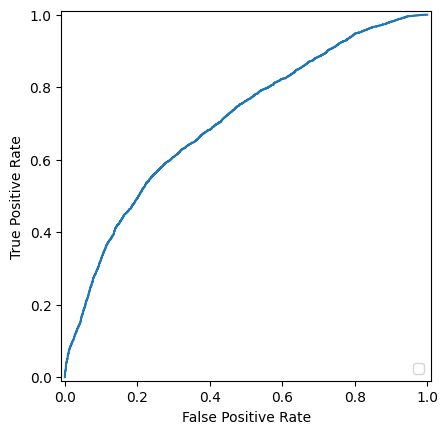

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Посчитаем ROC-AUC

In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.705043838833117

### PR-кривая

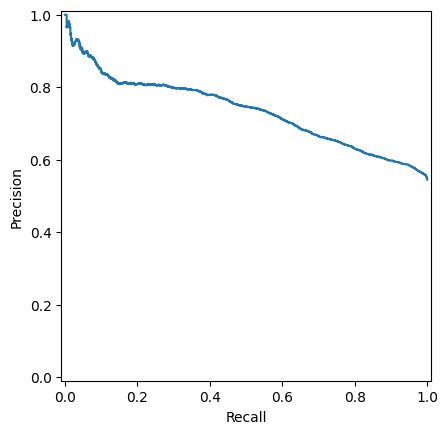

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [ ]:
auc(recall, precision)

0.7351375535581868

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('KNN',KNeighborsClassifier(n_neighbors=5))
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

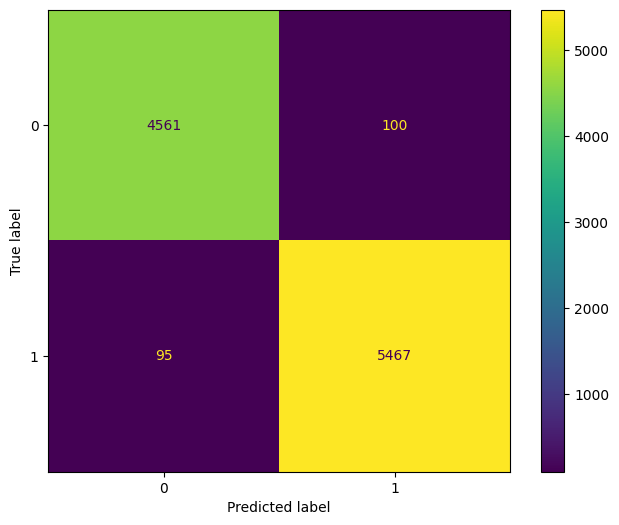

In [ ]:
cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [ ]:
print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.981
Precision равно: 0.982
Recall равно: 0.983
F-мера равно: 0.982


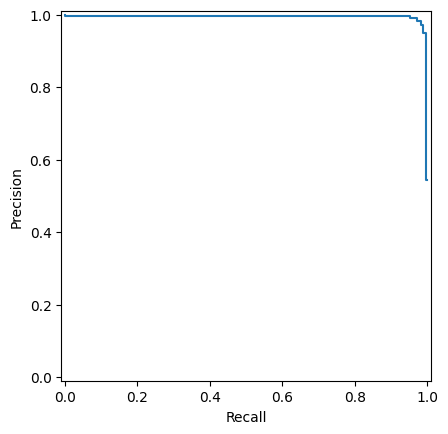

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [ ]:
auc(recall, precision)

0.9966403989656933

### SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
model_lsvc = LinearSVC()
model_lsvc.fit(X_train, Y_train)

LinearSVC()

In [ ]:
Y_scores = model_lsvc.decision_function(X_test)

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_scores)

In [ ]:
pr_auc = auc(recall, precision)

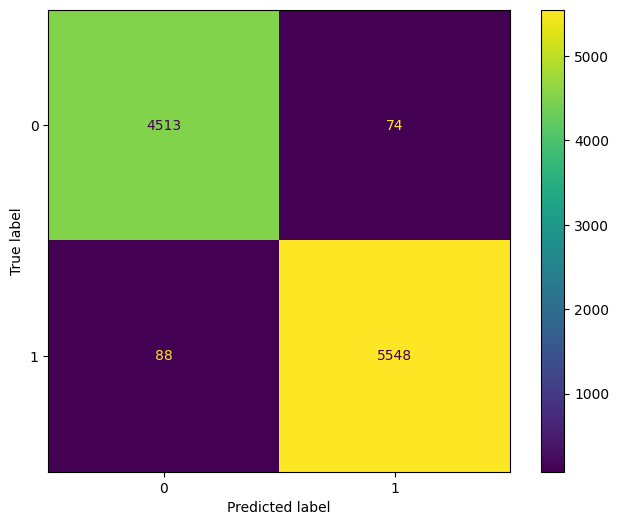

In [ ]:
cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [ ]:
print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.984
Precision равно: 0.987
Recall равно: 0.984
F-мера равно: 0.986


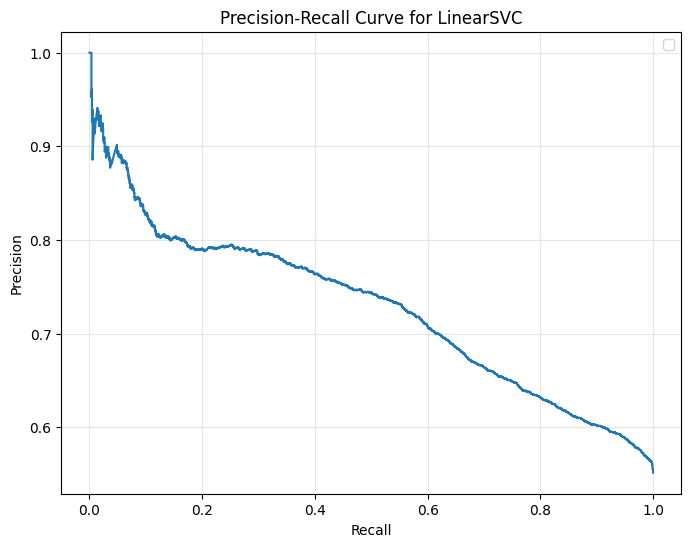

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for LinearSVC")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
auc(recall, precision)

0.7271534309408936